In [7]:
from utils import SurrogatPyRepEnvironment
from basic_walk.utils import BaseAgent
import sys
import time


import pickle
import matplotlib.pyplot as plt
import numpy as np

from tqc import structures, DEVICE
from tqc.trainer import Trainer
from tqc.structures import Actor, Critic, RescaleAction
from tqc.functions import eval_policy
from tqdm import tqdm, trange
import copy

from IPython.display import clear_output

## Анализ обучения

In [8]:
def extract_param(info_log, param_name):
    param = []
    for info in info_log:
        param.append(info[param_name])
    
    return param

In [9]:
t = 300000 - 1
file_name = f"data/learning_info/info_{t+1}.pickle"
with open(file_name, 'rb') as f:
    info = pickle.load(f)

-0.6637052653697103


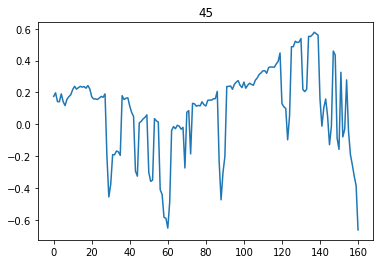

-1.5566702038674165


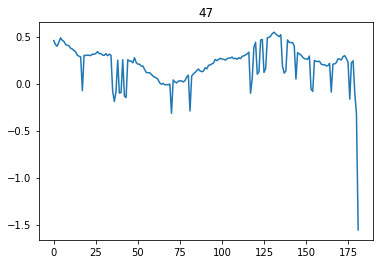

-0.013418438988574255


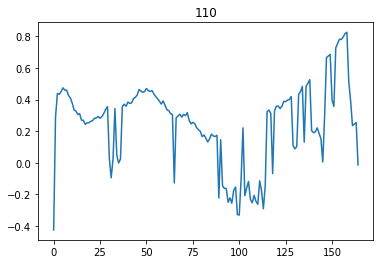

-0.16900860673981893


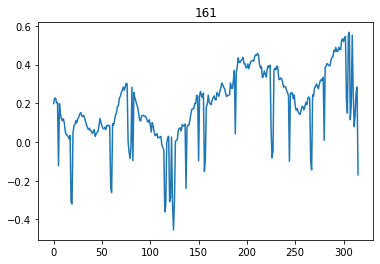

-0.42126293899389056


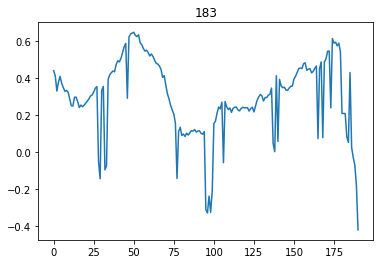

-0.5858412923868972


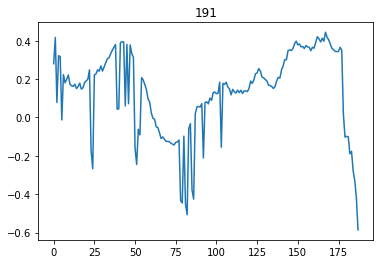

-0.19546176045582075


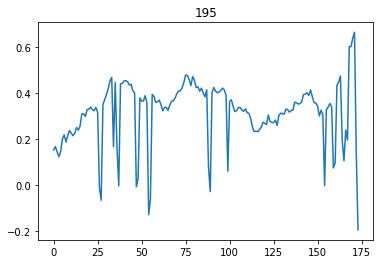

-0.19704745553560588


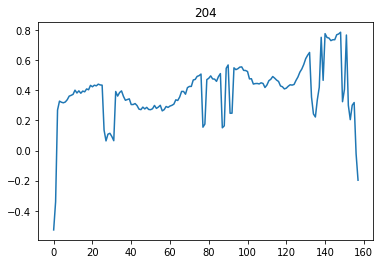

-0.5144092174710406


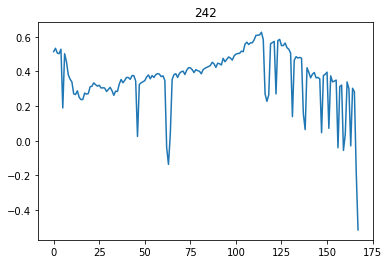

-0.5442522321071332


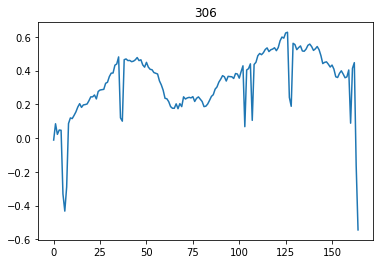

0.18257181759293806


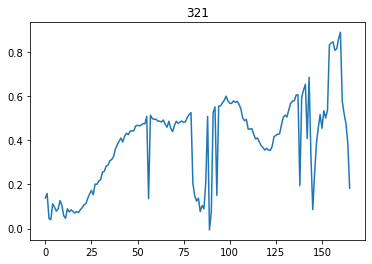

0.06728215325672184


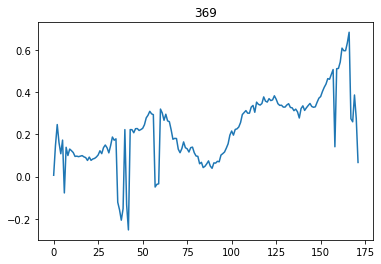

In [11]:
for i, cur_info in enumerate(info):
    if len(cur_info) < 150: # or cur_info[-1]["reward"] < 0:
        continue
    print(cur_info[-1]["reward"])
    reward = extract_param(cur_info, "reward")
    plt.title(i)
    plt.plot(reward)
    plt.show()

In [5]:
info[0][0].keys()

dict_keys(['fall_metric', 'y', 'x', 'zpos', 'fall_reward', 'fall_prob', 'velocity_reward', 'smooth_reward', 'collision_reward', 'reward', 'done', 'action', 'state'])

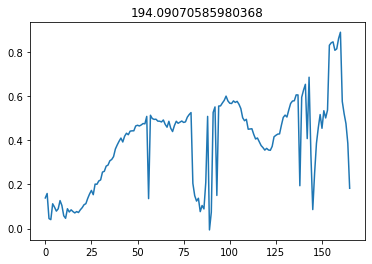

In [12]:
reward = extract_param(info[321], "reward")
plt.title(sum(reward) / len(reward) * 500)
plt.plot(reward)
plt.show()

In [7]:
# assert False

# Display Replay

In [6]:
# info_to_replay = [info[242], ] * 3
info_to_replay = info
by = 'action'
# by = 'state'

new_info = []
with SurrogatPyRepEnvironment('scenes/basic_scene.ttt', headless_mode=False, foot_only_mode=True) as env:
    for glob_info in reversed(info_to_replay):
        np.random.seed(0)
        env.reset()
        apliers = extract_param(glob_info, by)
        for aplier in apliers:
            if by == 'action':
                _, _, _, curr_info = env.step(aplier)
            else:
                _, _, _, curr_info = env.replay_step(aplier)
                
            new_info.append(curr_info)


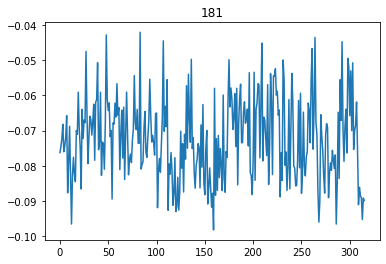

In [10]:
param = extract_param(new_info, "smooth_reward")
# param = extract_param(info[758], "reward")

plt.title(i)
plt.plot(param)
plt.show()